In [3]:
import pandas as pnd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.model_selection as ss
import sklearn.neighbors as sn
import sklearn.metrics as mt
import numpy as np
#from scipy.stats import chi2_contingency

df = pnd.read_csv("Algerian_forest_fires_dataset_UPDATE.csv", header = "infer", delimiter="\s*,\s*")
df.info()
print(df)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int64  
 1   month        244 non-null    int64  
 2   year         244 non-null    int64  
 3   Temperature  244 non-null    int64  
 4   RH           244 non-null    int64  
 5   Ws           244 non-null    int64  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    float64
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    float64
 13  Classes      244 non-null    object 
dtypes: float64(7), int64(6), object(1)
memory usage: 26.8+ KB
     day  month  year  Temperature  RH  Ws  Rain  FFMC   DMC    DC  ISI   BUI  \
0      1      6  2012           29  57  18   0.0  65.7   3.4   7.6  1.3   3.4  

<ipython-input-3-d970eaec9b20>:10: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pnd.read_csv("Algerian_forest_fires_dataset_UPDATE.csv", header = "infer", delimiter="\s*,\s*")


fire        138
not fire    106
Name: Classes, dtype: int64
Temperature    32.172131
RH             61.938525
Ws             15.504098
Rain            0.760656
FFMC           77.887705
DMC            14.673361
DC             49.288115
ISI             4.759836
BUI            16.673361
FWI             7.049180
dtype: float64
Temperature      13.204817
RH              221.539415
Ws                7.897102
Rain              3.997623
FFMC            205.565939
DMC             152.968382
DC             2267.632245
ISI              17.260932
BUI             201.686818
FWI              55.180617
dtype: float64
Temperature     3.633843
RH             14.884200
Ws              2.810178
Rain            1.999406
FFMC           14.337571
DMC            12.368039
DC             47.619662
ISI             4.154628
BUI            14.201648
FWI             7.428366
dtype: float64


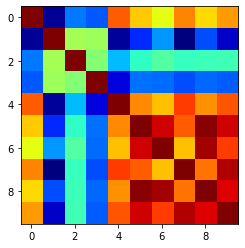

In [4]:

x = df['Classes']
print(x.value_counts())

Y = df['Classes']
df.drop(["day","month","year","Classes"], axis=1, inplace = True)

print(df.mean(axis=0))
print(df.var(axis=0))
print(df.std(axis=0))
# corrélation 
coef = df.corr()
plt.imshow(coef)
#To change colors
plt.set_cmap("jet")
plt.show()


     Temperature  RH  Ws  Rain  FFMC   DMC    DC  ISI   BUI  FWI
0             29  57  18   0.0  65.7   3.4   7.6  1.3   3.4  0.5
1             29  61  13   1.3  64.4   4.1   7.6  1.0   3.9  0.4
2             26  82  22  13.1  47.1   2.5   7.1  0.3   2.7  0.1
3             25  89  13   2.5  28.6   1.3   6.9  0.0   1.7  0.0
4             27  77  16   0.0  64.8   3.0  14.2  1.2   3.9  0.5
..           ...  ..  ..   ...   ...   ...   ...  ...   ...  ...
239           30  65  14   0.0  85.4  16.0  44.5  4.5  16.9  6.5
240           28  87  15   4.4  41.1   6.5   8.0  0.1   6.2  0.0
241           27  87  29   0.5  45.9   3.5   7.9  0.4   3.4  0.2
242           24  54  18   0.1  79.7   4.3  15.2  1.7   5.1  0.7
243           24  64  15   0.2  67.3   3.8  16.5  1.2   4.8  0.5

[244 rows x 10 columns] 0      not fire
1      not fire
2      not fire
3      not fire
4      not fire
         ...   
239        fire
240    not fire
241    not fire
242    not fire
243    not fire
Name: Classes, Leng

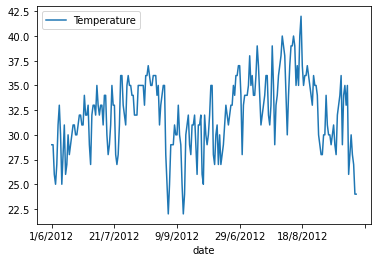

ValueError: Could not interpret value `Classes` for parameter `hue`

In [5]:
X = df
print(X,Y)
print(Y.value_counts(normalize=True))

df = pnd.read_csv("Algerian_forest_fires_dataset_UPDATE.csv", header = "infer", delimiter=",")

df['date'] = df['day'].astype(str) + '/' + df['month'].astype(str) + '/' + df['year'].astype(str)
d = df.plot('date','Temperature')
plt.show()

print("\n \n")
#plt.show()
sns.scatterplot(x="Temperature", y="FWI", data=df,hue = "Classes")
plt.show()

In [6]:

print(X)
print(Y)
Xa, Xt, Ya, Yt  = ss.train_test_split(X, Y, shuffle=True, test_size= 1/3)
Xa, Xv, Ya, Yv = ss.train_test_split(Xa, Ya, shuffle=True, test_size= 1/3)




     Temperature  RH  Ws  Rain  FFMC   DMC    DC  ISI   BUI  FWI
0             29  57  18   0.0  65.7   3.4   7.6  1.3   3.4  0.5
1             29  61  13   1.3  64.4   4.1   7.6  1.0   3.9  0.4
2             26  82  22  13.1  47.1   2.5   7.1  0.3   2.7  0.1
3             25  89  13   2.5  28.6   1.3   6.9  0.0   1.7  0.0
4             27  77  16   0.0  64.8   3.0  14.2  1.2   3.9  0.5
..           ...  ..  ..   ...   ...   ...   ...  ...   ...  ...
239           30  65  14   0.0  85.4  16.0  44.5  4.5  16.9  6.5
240           28  87  15   4.4  41.1   6.5   8.0  0.1   6.2  0.0
241           27  87  29   0.5  45.9   3.5   7.9  0.4   3.4  0.2
242           24  54  18   0.1  79.7   4.3  15.2  1.7   5.1  0.7
243           24  64  15   0.2  67.3   3.8  16.5  1.2   4.8  0.5

[244 rows x 10 columns]
0      not fire
1      not fire
2      not fire
3      not fire
4      not fire
         ...   
239        fire
240    not fire
241    not fire
242    not fire
243    not fire
Name: Classes, Leng

In [9]:

clf = sn.KNeighborsClassifier(n_neighbors=3)
clf.fit(Xa, Ya) #APPRENTISSAGE
clf.fit(Xt, Yt) # TEST
Yv_predict = clf.predict(Xv) # PREDICTION
erreur = 1 - mt.accuracy_score(Yv, Yv_predict) #EVALUATION



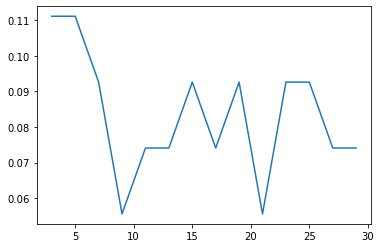

In [10]:
vecteur_k = np.arange(3, 30, 2) # TABLEAU de 3 à 29
vecteur_erreur = []
for i, k in enumerate(vecteur_k):
    clf = sn.KNeighborsClassifier(n_neighbors= k)
    clf.fit(Xa, Ya)
    Yv_predict = clf.predict(Xv)
    erreur = 1 - mt.accuracy_score(Yv, Yv_predict)
    vecteur_erreur.append(erreur)
plt.plot(vecteur_k, vecteur_erreur)
#plt.show()



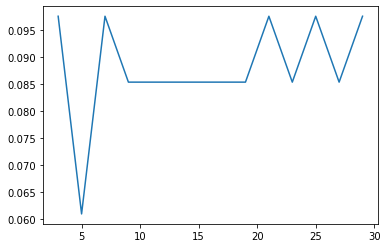

In [11]:
vecteur_kt=np.arange (3,30,2)
vecteur_erreurt=[]
for i, k in enumerate(vecteur_k):
    clf=sn.KNeighborsClassifier(n_neighbors=k)
    clf.fit(Xa,Ya)#approntissage
    Yv_predict=clf.predict(Xt)
    err=1-mt.accuracy_score(Yt, Yv_predict)   #evaluation
    vecteur_erreurt.append(err)
plt.plot(vecteur_kt, vecteur_erreurt)
plt.show()

In [12]:
# NORMALIZATION
import sklearn.preprocessing as sp
sc = sp.StandardScaler(with_mean = True, with_std = True)
sc.fit(Xa)
sc.transform(Xa)

array([[ 1.6812883 , -1.74715634, -0.28455757, ...,  2.43064506,
         0.44014812,  1.7473373 ],
       [ 0.20503516,  0.09310864,  0.47426261, ..., -0.78599377,
         0.3547669 , -0.61912401],
       [ 0.79553641,  0.55317489,  0.47426261, ..., -0.76318072,
         1.47183792, -0.40048357],
       ...,
       [-1.56646861,  0.29027989,  2.37131306, ..., -0.74036768,
        -0.09348454, -0.67056882],
       [-0.3854661 ,  0.35600364,  0.47426261, ..., -0.60348944,
        -0.49904535, -0.64484642],
       [-0.97596735,  1.73620238, -1.04337775, ..., -0.87724593,
        -0.92595148, -0.87634807]])